# Cluster Analysis

In [2]:
import pandas as pd

## Hierarchical cluster analysis

# Example 1

File beer.xlsx


Variables:

    bier  - Name of the brand
    producer - Name of the producer 
    costs - Spending in dollars for capacity equal to 12 ounces
    calories - calories for the same amount of beer
    alcohol - alcohol content in percent

In [3]:
df1 = pd.read_excel('beer.xlsx')
df1

,bier,producer,costs,calories,alcohol
0,Budweiser,USA,0.43,144,4.7
1,Lowenbrau,USA,0.48,157,4.9
2,Michelob,USA,0.50,162,5.0
3,Kronenbourg,France,0.73,170,5.2
4,Heineken,Holland,0.77,152,5.0
5,Schmidts,USA,0.30,147,4.7
6,Pabst Blue Ribbon,USA,0.38,152,4.9
7,Miller Light,USA,0.43,99,4.3
8,Budweiser Light,USA,0.44,113,3.7
9,Coors Light,USA,0.46,102,4.1


## Preliminary graphical data analysis

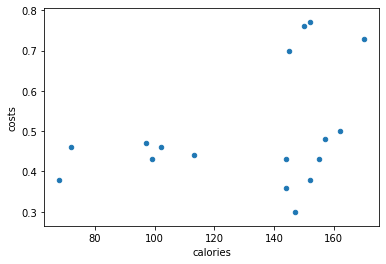

In [5]:
df1.plot('calories', 'costs', kind='scatter') #could be done in we cluster based on 2 variables

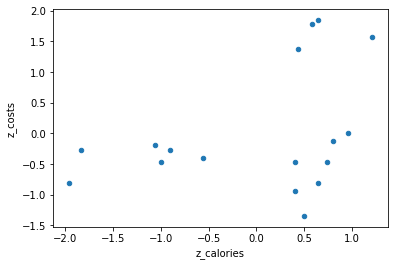

In [6]:
df1['z_calories'] = (df1['calories'] - df1['calories'].mean())/df1['calories'].std()
df1['z_costs'] = (df1['costs'] - df1['costs'].mean())/df1['costs'].std()
df1.plot('z_calories', 'z_costs', kind='scatter')
#we standardize the values of the variables as they are measured in different scales

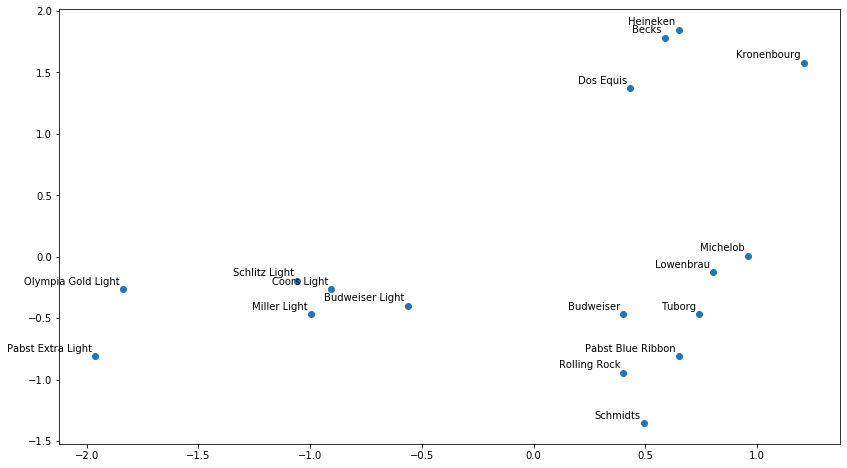

In [7]:
import matplotlib.pyplot as plt
labels = df1['bier']
plt.figure(figsize=(14, 8))
plt.scatter(df1['z_calories'],df1['z_costs'], label='True Position')

for label, x, y in zip(labels, df1['z_calories'], df1['z_costs']): #add labels with brand names
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

About linkage: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

About fckuster: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

About dendrogram: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

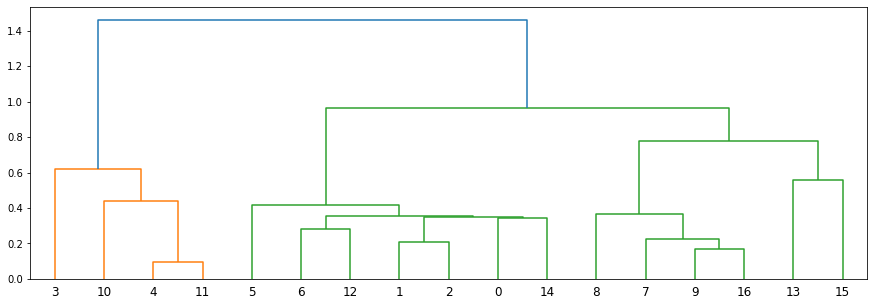

In [9]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'single'))
#Nearest neighbor / Single-linkage

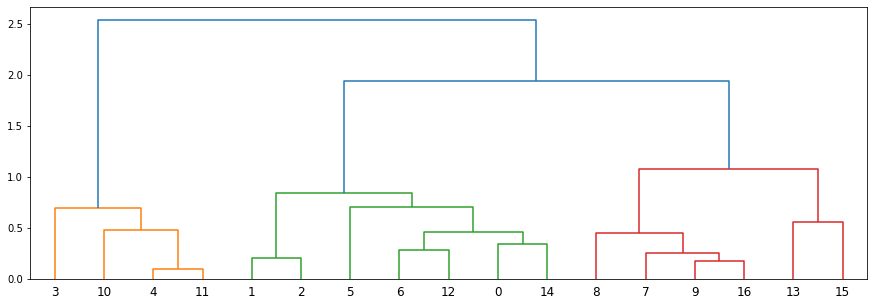

In [10]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'average'))
#Average Linkage / Between Groups Linkage

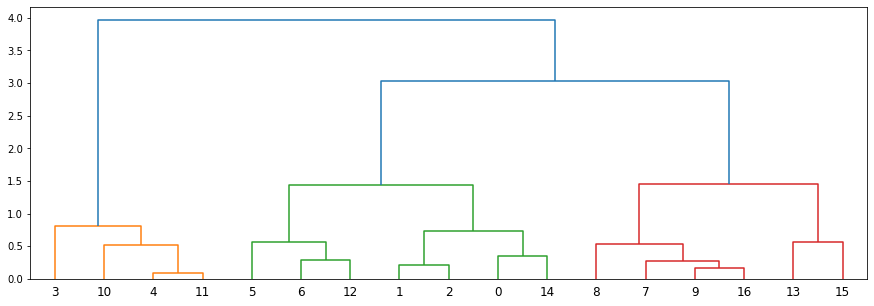

In [11]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'complete'))
#Furthest neighbor / Complete-linkage

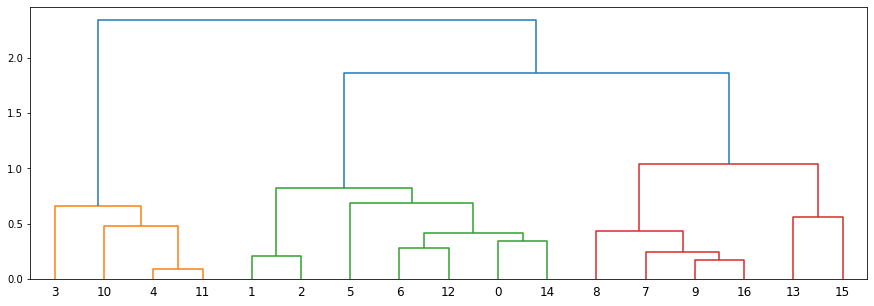

In [12]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'centroid'))
#Centroid Clustering

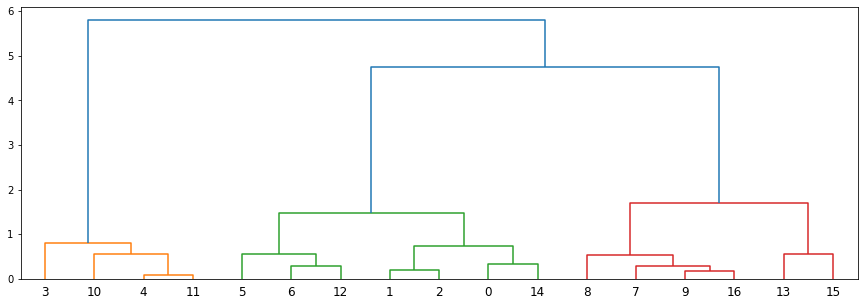

In [17]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'ward'))
#Ward's Method

## Calinski-Harabasz Index 

About calinski_harabasz_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html

In [18]:
from sklearn.metrics import calinski_harabasz_score
Z = linkage(df1[['z_calories', 'z_costs']], method='ward', metric='euclidean') 
labels = fcluster(Z, t=3, criterion='maxclust') #t defines the number of clusters
calinski_harabasz_score(df1[['z_calories', 'z_costs']], labels)

50.32657953724121

In [19]:
for k in range (2, 10):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Number of clusters: {}, index {}'.format(k, calinski_harabasz_score(df1[['z_calories', 'z_costs']], labels)))

Number of clusters: 2, index 16.64498460748926
Number of clusters: 3, index 50.32657953724121
Number of clusters: 4, index 51.80382074566064
Number of clusters: 5, index 67.0535707144872
Number of clusters: 6, index 65.19050945075712
Number of clusters: 7, index 66.63167402114675
Number of clusters: 8, index 64.58809025811043
Number of clusters: 9, index 66.99883144398997


In [20]:
labels = fcluster(Z, t=3, criterion='maxclust')
labels

array([2, 2, 2, 1, 1, 2, 2, 3, 3, 3, 1, 1, 2, 3, 2, 3, 3], dtype=int32)

About maxclust: https://datascience.stackexchange.com/questions/84594/what-is-criterion-in-flcuster-of-scipy-package

In [21]:
df1['culster_labels'] = labels #new variable showing to which cluster the observation belongs to
df1

,bier,producer,costs,calories,alcohol,z_calories,z_costs,culster_labels
0,Budweiser,USA,0.43,144,4.7,0.400407,-0.468980,2
1,Lowenbrau,USA,0.48,157,4.9,0.804471,-0.128268,2
2,Michelob,USA,0.50,162,5.0,0.959880,0.008017,2
3,Kronenbourg,France,0.73,170,5.2,1.208535,1.575291,1
4,Heineken,Holland,0.77,152,5.0,0.649062,1.847861,1
5,Schmidts,USA,0.30,147,4.7,0.493653,-1.354830,2
6,Pabst Blue Ribbon,USA,0.38,152,4.9,0.649062,-0.809692,2
7,Miller Light,USA,0.43,99,4.3,-0.998275,-0.468980,3
8,Budweiser Light,USA,0.44,113,3.7,-0.563130,-0.400837,3
9,Coors Light,USA,0.46,102,4.1,-0.905030,-0.264553,3


##  Descriptive statistics by clusters

In [37]:
df1.groupby('culster_labels')[['costs', 'calories']].mean()

,costs,calories
culster_labels,,
1,0.740000,154.250000
2,0.411429,151.571429
3,0.440000,91.833333


In [38]:
df1['culster_labels'].value_counts()

2    7
3    6
1    4
Name: culster_labels, dtype: int64

##  Description of clusters

TBD

# Example 2

File assess.xlsx


Variables:

    nr  - Identification of the candidate
    name - Name of the candidate 
    t1 - Memory for numbers (values of t1 - t10 vary from 1 - poor to 10 - excellent)
    t2 - Mathematical skills
    t3 - Readiness for direct dialogues
    t4 - Ability to prepare algorithms
    t5 - Speech confidence
    t6 - Team Spirit
    t7 - Resourcefulness
    t8 - Cooperation
    t9 - Recognition by others
    t10 - Ability to persuade

In [26]:
df2 = pd.read_excel('assess.xlsx', index_col=0)
df2

,name,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
nr,,,,,,,,,,,
1,Volker R,10,10,9,10,10,10,9,10,10,9
2,Sigrid K,10,10,4,10,5,5,4,5,4,3
3,Elmar M,5,4,10,5,10,4,10,5,3,10
4,Peter B,10,10,9,10,10,10,9,10,10,9
5,Otto R,4,3,5,4,3,10,4,10,10,5
6,Elke M,10,10,4,10,5,4,3,4,5,5
7,Sarah K,4,4,5,5,4,10,5,10,10,6
8,Peter T,4,5,3,4,5,10,4,10,10,4
9,Gudrun M,4,5,10,4,10,5,10,4,3,10


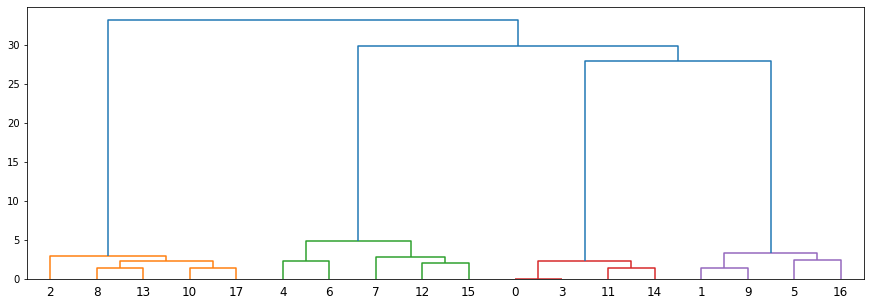

In [27]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df2[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']], 'ward'))
#Ward's Method

In [30]:
Z = linkage(df2[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']], method='ward', metric='euclidean') 
for k in range (2, 15):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Number of clusters: {}, index {}'.format(k, calinski_harabasz_score(df2[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']], labels)))

Number of clusters: 2, index 10.014207154732421
Number of clusters: 3, index 17.269744416302096
Number of clusters: 4, index 155.46624136097822
Number of clusters: 5, index 150.59763476347635
Number of clusters: 6, index 136.40645161290323
Number of clusters: 7, index 126.44037940379404
Number of clusters: 8, index 122.75613275613274
Number of clusters: 9, index 118.40277777777777
Number of clusters: 10, index 115.01683501683502
Number of clusters: 11, index 115.01683501683502
Number of clusters: 12, index 129.84848484848484
Number of clusters: 13, index 148.99305555555554
Number of clusters: 14, index 148.99305555555554


In [31]:
labels = fcluster(Z, t=4, criterion='maxclust') #4 clusters
df2['culster_labels'] = labels
df2

,name,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,culster_labels
nr,,,,,,,,,,,,
1,Volker R,10,10,9,10,10,10,9,10,10,9,3
2,Sigrid K,10,10,4,10,5,5,4,5,4,3,4
3,Elmar M,5,4,10,5,10,4,10,5,3,10,1
4,Peter B,10,10,9,10,10,10,9,10,10,9,3
5,Otto R,4,3,5,4,3,10,4,10,10,5,2
6,Elke M,10,10,4,10,5,4,3,4,5,5,4
7,Sarah K,4,4,5,5,4,10,5,10,10,6,2
8,Peter T,4,5,3,4,5,10,4,10,10,4,2
9,Gudrun M,4,5,10,4,10,5,10,4,3,10,1


In [32]:
df2['culster_labels'].value_counts()

1    5
2    5
3    4
4    4
Name: culster_labels, dtype: int64

In [33]:
df2.columns

Index(['name', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10',
       'culster_labels'],
      dtype='object')

In [34]:
df2.columns = ['Name', 'Memory for numbers', 'Mathematical skills', 'Readiness for direct dialogues', 
              'Ability to prepare algorithms', 'Speech confidence', 'Team Spirit', 'Resourcefulness',
              'Cooperation', 'Recognition by others', 'Ability to persuade', 'Clusters']
df2

,Name,Memory for numbers,Mathematical skills,Readiness for direct dialogues,Ability to prepare algorithms,Speech confidence,Team Spirit,Resourcefulness,Cooperation,Recognition by others,Ability to persuade,Clusters
nr,,,,,,,,,,,,
1,Volker R,10,10,9,10,10,10,9,10,10,9,3
2,Sigrid K,10,10,4,10,5,5,4,5,4,3,4
3,Elmar M,5,4,10,5,10,4,10,5,3,10,1
4,Peter B,10,10,9,10,10,10,9,10,10,9,3
5,Otto R,4,3,5,4,3,10,4,10,10,5,2
6,Elke M,10,10,4,10,5,4,3,4,5,5,4
7,Sarah K,4,4,5,5,4,10,5,10,10,6,2
8,Peter T,4,5,3,4,5,10,4,10,10,4,2
9,Gudrun M,4,5,10,4,10,5,10,4,3,10,1


In [35]:
df2.groupby('Clusters').mean()

,Memory for numbers,Mathematical skills,Readiness for direct dialogues,Ability to prepare algorithms,Speech confidence,Team Spirit,Resourcefulness,Cooperation,Recognition by others,Ability to persuade
Clusters,,,,,,,,,,
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50
4,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25


In [36]:
df2.groupby('Clusters').mean().T

Clusters,1,2,3,4
Memory for numbers,4.2,4.8,10.00,10.00
Mathematical skills,4.8,4.4,10.00,10.00
Readiness for direct dialogues,10.0,4.0,9.00,4.25
Ability to prepare algorithms,4.4,4.0,10.00,10.00
Speech confidence,10.0,4.2,10.00,4.75
Team Spirit,4.4,10.0,9.50,4.50
Resourcefulness,10.0,4.4,9.25,3.75
Cooperation,4.0,10.0,9.75,4.25
Recognition by others,3.8,10.0,10.00,4.25
Ability to persuade,10.0,5.0,9.50,4.25


##  Description of clusters

TBD

## k-means cluster analysis

Dataset: https://www.kaggle.com/datasnaek/youtube-new

In [41]:
df3 = pd.read_excel('youtube.xlsx')
df3

,video_id,title,channel_title,publish_time,views,likes,dislikes,comment_count,country
0,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,149376127,3093544,1643059,810698,US
1,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,137843120,3014471,1602383,817582,US
2,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,125432237,2912702,1545015,807558,US
3,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,113874632,2811215,1470383,787174,US
4,TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,2017-11-17T05:00:01.000Z,102012605,2376636,117196,134224,US
...,...,...,...,...,...,...,...,...,...
3368,mE9oqeXj4WY,DOMO WILSON REACTED TO MY SONG!!! (REACTION VI...,Queen Naija,2018-01-09T23:25:37.000Z,1381198,123524,1029,11970,US
3369,ItL6vcUrpUs,MACKLEMORE FEAT DAVE B & TRAVIS THOMPSON - COR...,Macklemore LLC,2017-12-21T17:00:20.000Z,1381081,70142,1790,3131,US
3370,CWAX-tiepMo,RWBY Volume 5: Chapter 14 - Haven's Fate | Roo...,Rooster Teeth,2018-01-27T16:00:00.000Z,1380940,49981,2818,20286,US
3371,B9nVxg3DqAM,Developer Update | Happy Year of the Dog! | Ov...,PlayOverwatch,2018-02-07T00:55:22.000Z,1380249,42754,1225,9455,US


In [42]:
df3['z_views'] = (df3['views'] - df3['views'].mean())/df3['views'].std()
df3['z_likes'] = (df3['likes'] - df3['likes'].mean())/df3['likes'].std()
df3['z_dislikes'] = (df3['dislikes'] - df3['dislikes'].mean())/df3['dislikes'].std()
df3['z_comment_count'] = (df3['comment_count'] - df3['comment_count'].mean())/df3['comment_count'].std()
df3

,video_id,title,channel_title,publish_time,views,likes,dislikes,comment_count,country,z_views,z_likes,z_dislikes,z_comment_count
0,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,149376127,3093544,1643059,810698,US,15.589827,9.347265,17.683401,9.883878
1,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,137843120,3014471,1602383,817582,US,14.341644,9.093412,17.241942,9.970357
2,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,125432237,2912702,1545015,807558,US,12.998451,8.766698,16.619323,9.844432
3,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,113874632,2811215,1470383,787174,US,11.747606,8.440888,15.809337,9.588360
4,TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,2017-11-17T05:00:01.000Z,102012605,2376636,117196,134224,US,10.463814,7.045735,1.123107,1.385748
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,mE9oqeXj4WY,DOMO WILSON REACTED TO MY SONG!!! (REACTION VI...,Queen Naija,2018-01-09T23:25:37.000Z,1381198,123524,1029,11970,US,-0.427225,-0.187555,-0.137661,-0.150055
3369,ItL6vcUrpUs,MACKLEMORE FEAT DAVE B & TRAVIS THOMPSON - COR...,Macklemore LLC,2017-12-21T17:00:20.000Z,1381081,70142,1790,3131,US,-0.427237,-0.358931,-0.129402,-0.261094
3370,CWAX-tiepMo,RWBY Volume 5: Chapter 14 - Haven's Fate | Roo...,Rooster Teeth,2018-01-27T16:00:00.000Z,1380940,49981,2818,20286,US,-0.427253,-0.423655,-0.118245,-0.045586
3371,B9nVxg3DqAM,Developer Update | Happy Year of the Dog! | Ov...,PlayOverwatch,2018-02-07T00:55:22.000Z,1380249,42754,1225,9455,US,-0.427328,-0.446856,-0.135534,-0.181649


In [43]:
X = df3[['z_views', 'z_likes', 'z_dislikes', 'z_comment_count']]
X

,z_views,z_likes,z_dislikes,z_comment_count
0,15.589827,9.347265,17.683401,9.883878
1,14.341644,9.093412,17.241942,9.970357
2,12.998451,8.766698,16.619323,9.844432
3,11.747606,8.440888,15.809337,9.588360
4,10.463814,7.045735,1.123107,1.385748
...,...,...,...,...
3368,-0.427225,-0.187555,-0.137661,-0.150055
3369,-0.427237,-0.358931,-0.129402,-0.261094
3370,-0.427253,-0.423655,-0.118245,-0.045586
3371,-0.427328,-0.446856,-0.135534,-0.181649


In [45]:
import warnings
warnings.filterwarnings("ignore")

About KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [51]:
from sklearn.cluster import KMeans
for k in range (2, 15):
    labels = KMeans(n_clusters=k).fit_predict(X)
    print('Number of clusters: {}, index {}'.format(k, calinski_harabasz_score(X, labels)))

Number of clusters: 2, index 3327.1760128427354
Number of clusters: 3, index 3931.920170775695
Number of clusters: 4, index 4268.26494575675
Number of clusters: 5, index 3991.848357207151
Number of clusters: 6, index 4037.700345195353
Number of clusters: 7, index 4312.98206986972
Number of clusters: 8, index 4289.302327031389
Number of clusters: 9, index 4368.812212578456
Number of clusters: 10, index 4442.210483188754
Number of clusters: 11, index 4437.571199007207
Number of clusters: 12, index 4574.748892944062
Number of clusters: 13, index 4690.977870208961
Number of clusters: 14, index 4772.690199475613


In [47]:
kmeans_model = KMeans(n_clusters=4).fit_predict(X)

In [48]:
df3['Clusters'] = kmeans_model
df3.head()

,video_id,title,channel_title,publish_time,views,likes,dislikes,comment_count,country,z_views,z_likes,z_dislikes,z_comment_count,Clusters
0,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,149376127,3093544,1643059,810698,US,15.589827,9.347265,17.683401,9.883878,1
1,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,137843120,3014471,1602383,817582,US,14.341644,9.093412,17.241942,9.970357,1
2,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,125432237,2912702,1545015,807558,US,12.998451,8.766698,16.619323,9.844432,1
3,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,113874632,2811215,1470383,787174,US,11.747606,8.440888,15.809337,9.588360,1
4,TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,2017-11-17T05:00:01.000Z,102012605,2376636,117196,134224,US,10.463814,7.045735,1.123107,1.385748,3


In [49]:
df3['Clusters'].value_counts()

0    3053
2     264
3      43
1      13
Name: Clusters, dtype: int64

In [50]:
df3.groupby('Clusters')['z_views', 'z_likes', 'z_dislikes', 'z_comment_count'].mean()

,z_views,z_likes,z_dislikes,z_comment_count
Clusters,,,,
0,-0.213956,-0.234861,-0.100620,-0.154653
1,7.307315,5.908843,15.037658,12.158660
2,1.412803,1.468792,0.170041,0.535895
3,4.307716,5.871012,1.553765,4.014361


##  Description of clusters

TBD